In [2]:
!echo "Liver Disease Prediction.. ML Model"

Liver Disease Prediction.. ML Model


In [3]:
!wget https://raw.githubusercontent.com/JishnuKakarla/Pharmacy_Managemment_System/master/datasets/indian_liver_patient.csv

--2023-05-07 14:15:31--  https://raw.githubusercontent.com/JishnuKakarla/Pharmacy_Managemment_System/master/datasets/indian_liver_patient.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23930 (23K) [text/plain]
Saving to: ‘indian_liver_patient.csv’

indian_liver_patien 100%[===================>]  23.37K  --.-KB/s    in 0.001s  

2023-05-07 14:15:31 (16.4 MB/s) - ‘indian_liver_patient.csv’ saved [23930/23930]



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('indian_liver_patient.csv')

In [6]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(0.947064)

<Axes: xlabel='Dataset', ylabel='count'>

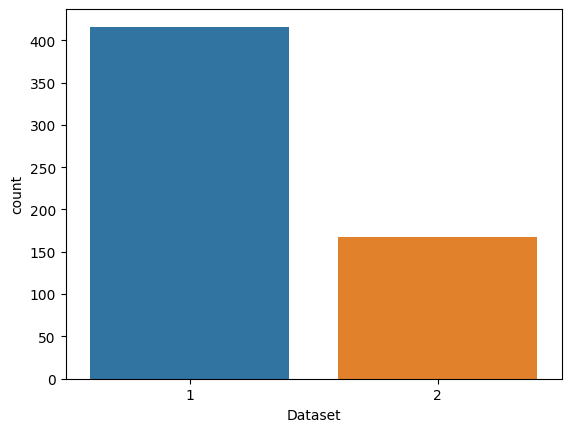

In [12]:
import seaborn as sns
sns.countplot(data=data, x='Dataset')


<Axes: xlabel='Gender', ylabel='count'>

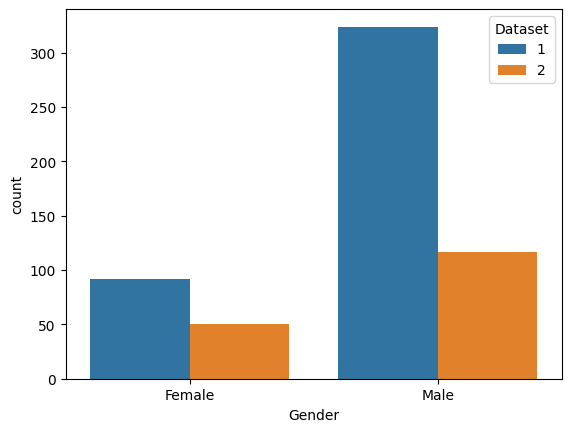

In [14]:
sns.countplot(x='Gender', hue='Dataset', data=data)

In [15]:
data = pd.get_dummies(data, columns = ['Gender'], drop_first = True)

<Axes: >

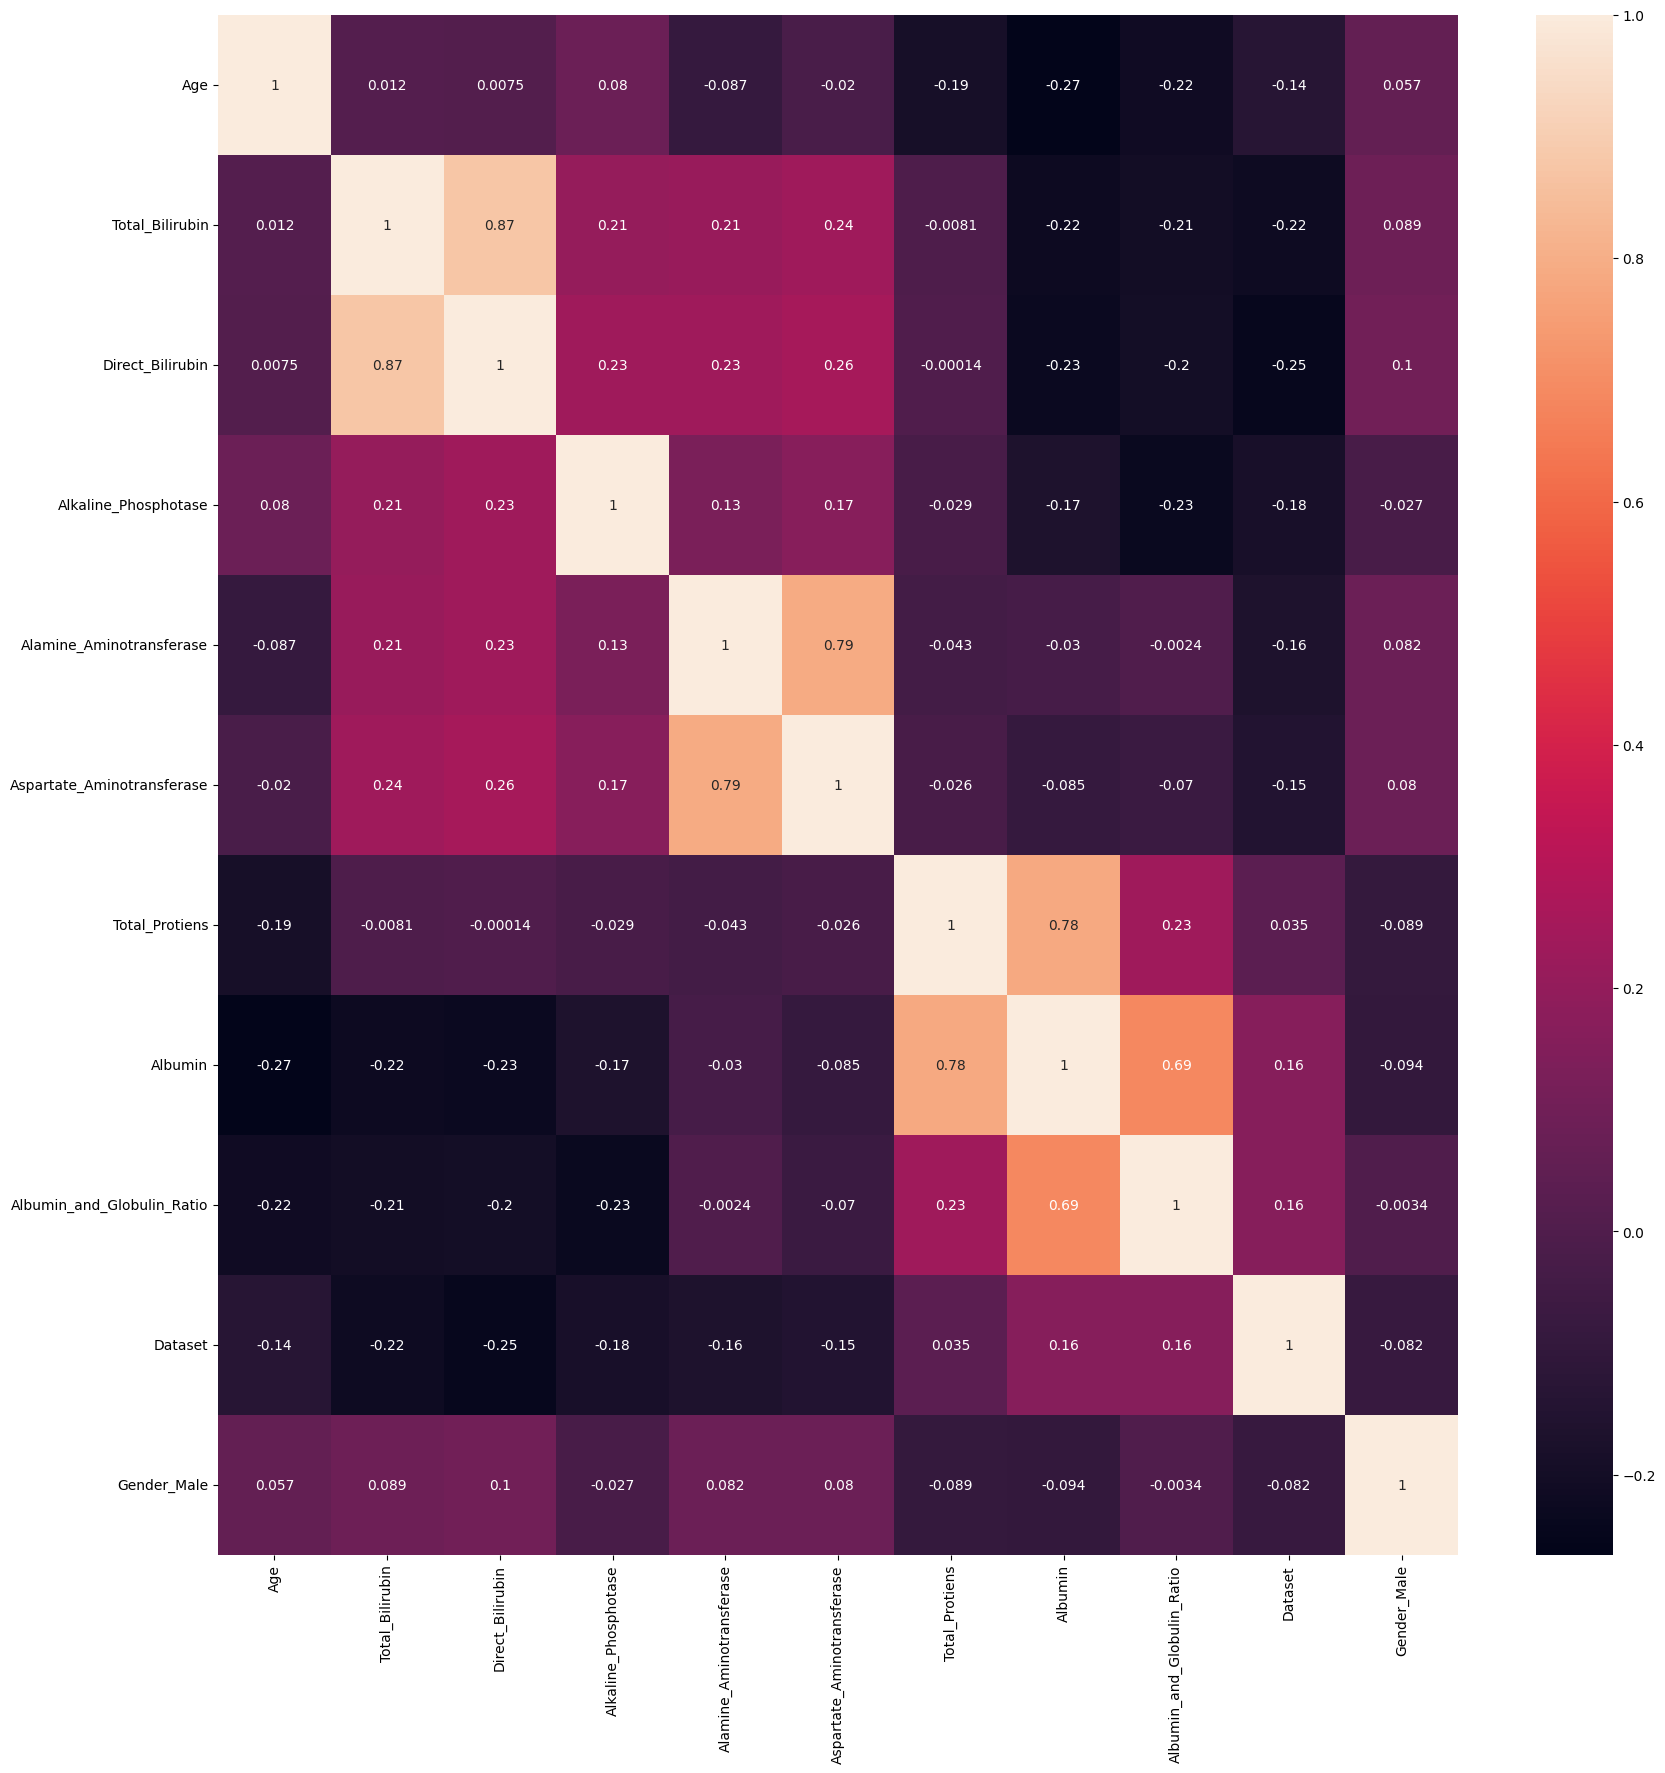

In [16]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True)

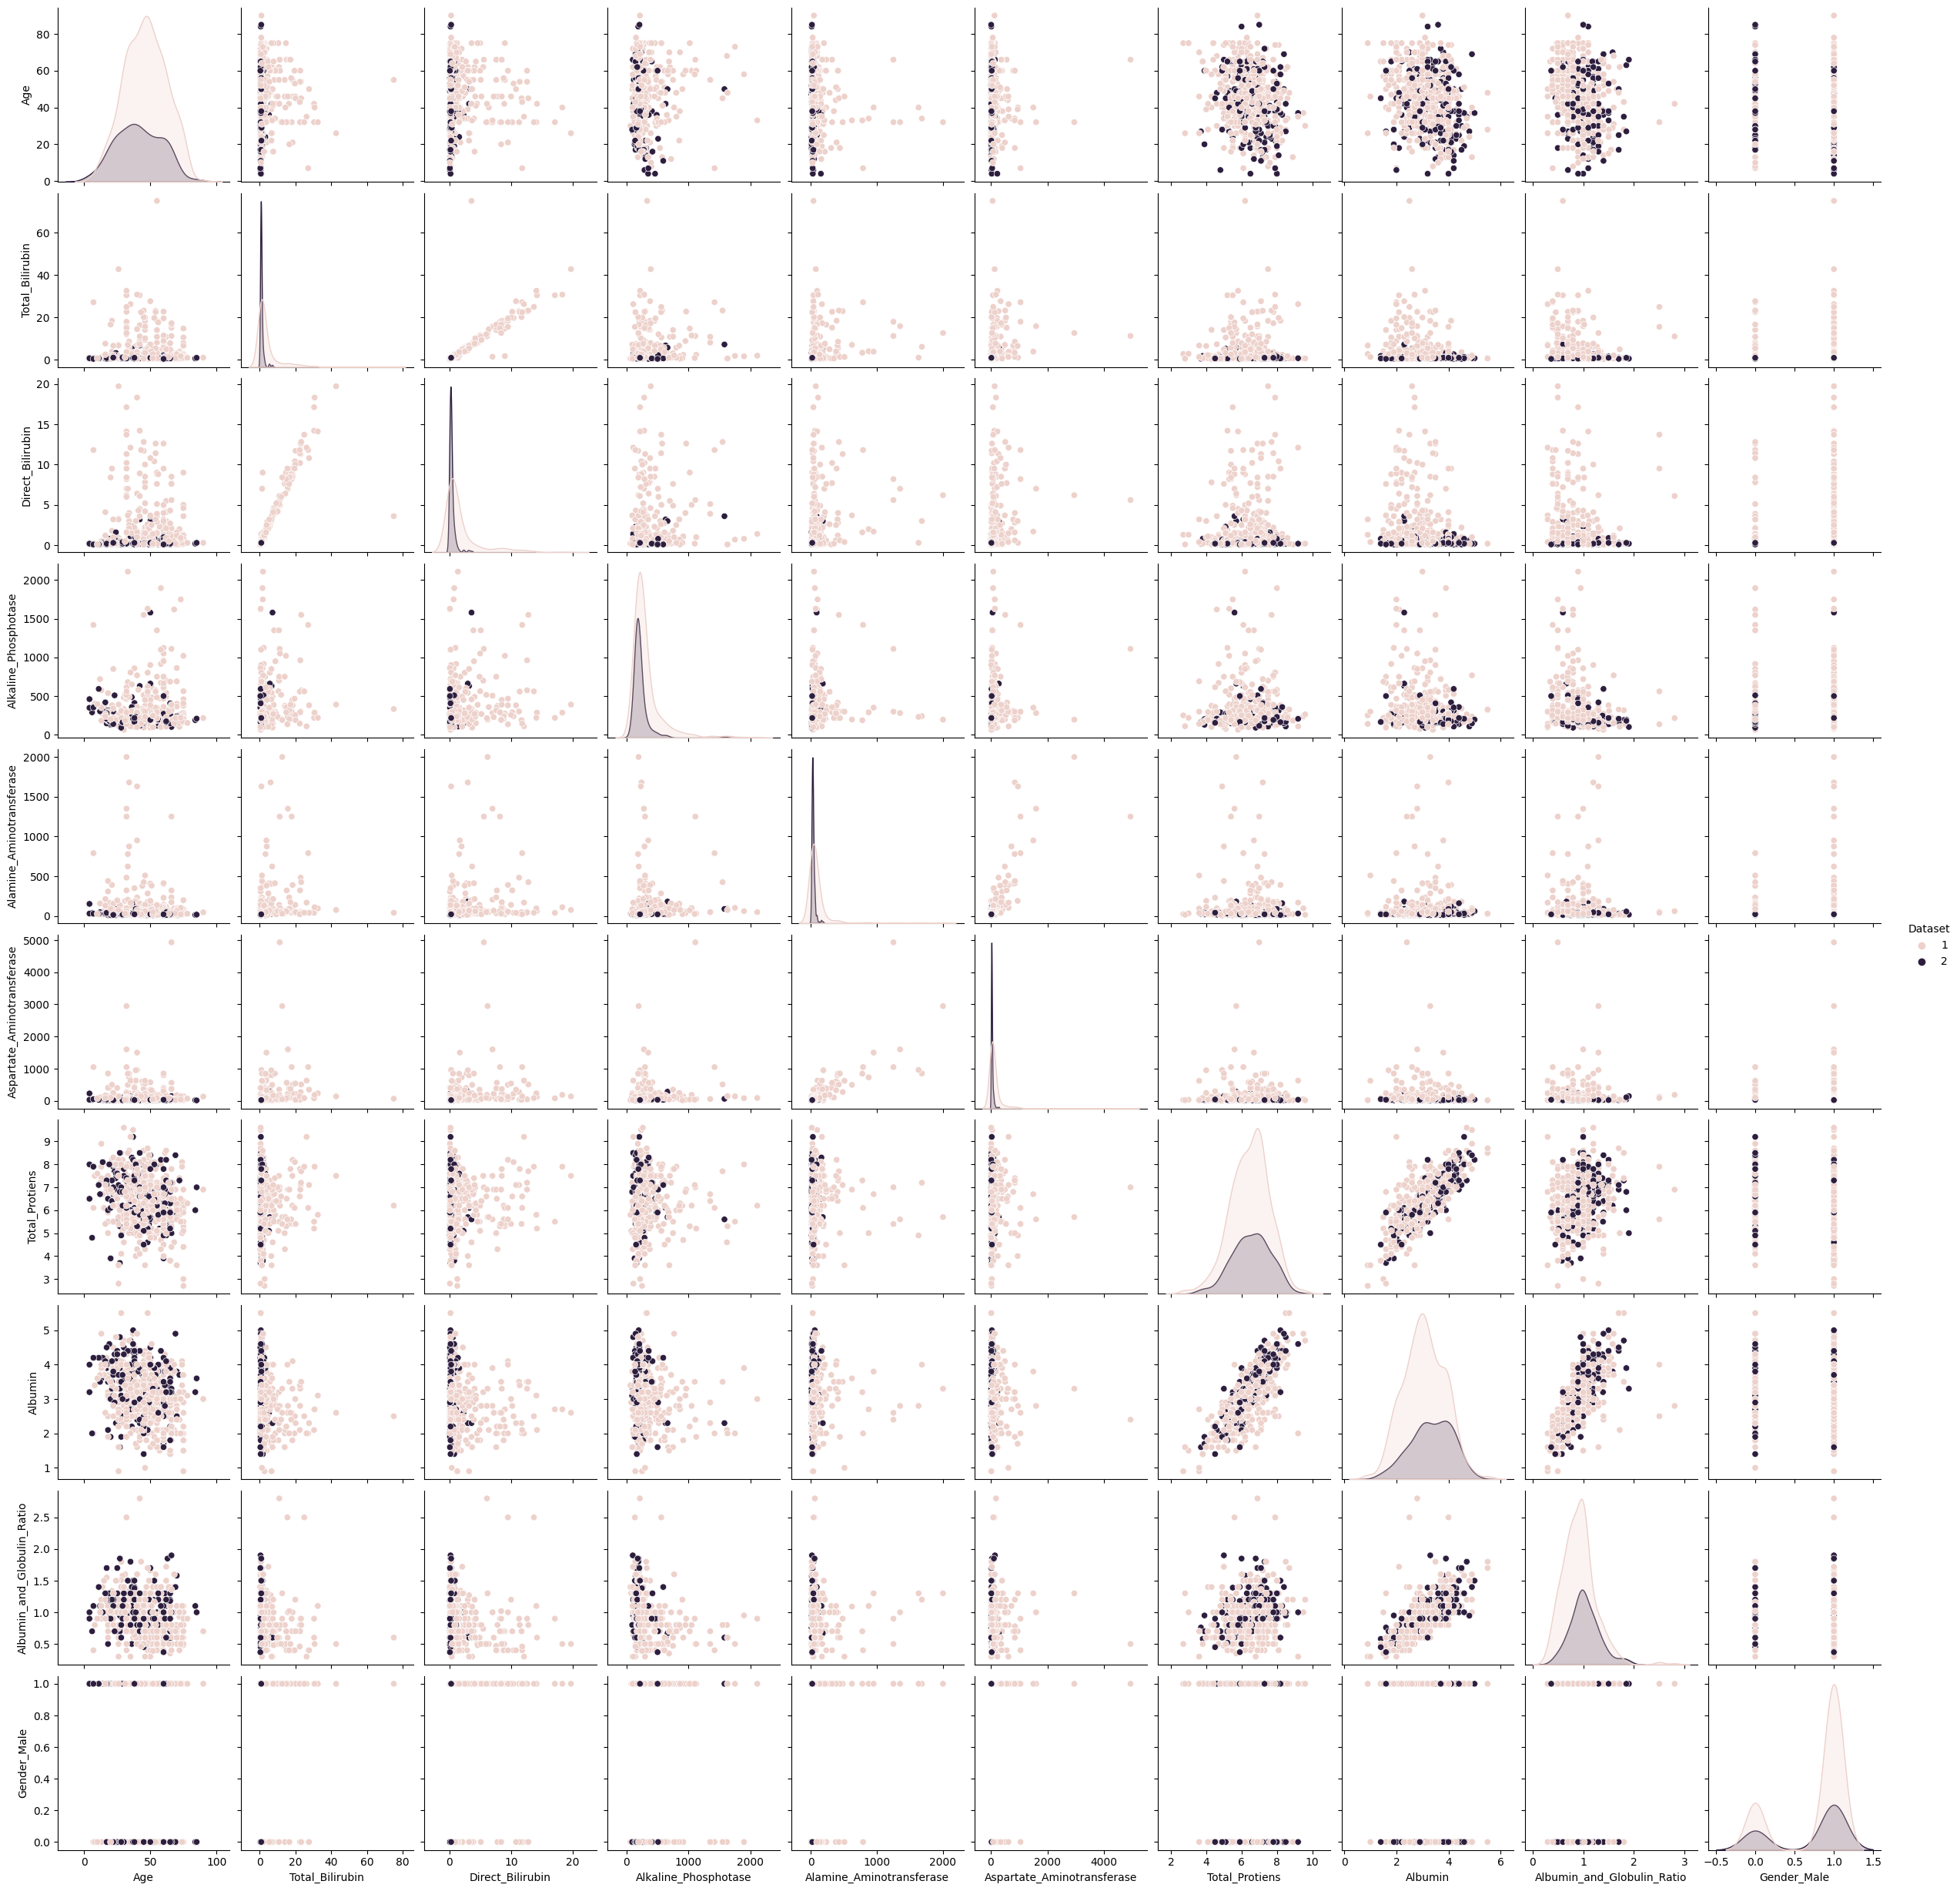

In [17]:
sns.pairplot(data, hue = 'Dataset')

In [18]:
data.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416,0.082332
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934,0.080336
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008,-0.089121
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388,-0.093799
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319,-0.003404
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162319,1.000000,-0.082416


In [19]:
X = data.drop('Dataset', axis = 1)
y = data['Dataset']

In [20]:
X.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
       'Gender_Male'],
      dtype='object')

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (524, 10) (524,)
Test Set:  (59, 10) (59,)


In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, model.predict(X_test))

array([[42,  3],
       [ 8,  6]])

In [25]:
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(X_test))*100,2)}")

Accuracy is 81.36


In [26]:
import pickle
pickle.dump(model, open('liver.pkl', 'wb'))